In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from random import randint

# URL of the Indian cricket team players page
URL = 'https://www.cricbuzz.com/cricket-team/india/2/players'

# Headers to mimic browser requests
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
}

# Initialize a session
session = requests.Session()

# Fetch the main page content
response = session.get(URL, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# List to store player data
players = []

# Extract player links
for player_card in soup.find_all('a', class_='cb-col cb-col-50'):
    name = player_card.text.strip()
    link = 'https://www.cricbuzz.com' + player_card['href']

    # Fetch individual player profile
    player_response = session.get(link, headers=headers)
    player_soup = BeautifulSoup(player_response.content, 'html.parser')

    # Introduce a delay to mimic human browsing
    time.sleep(randint(1, 3))

    # Dictionary to hold career statistics
    career_stats = {}

    # Extract batting career summary
    batting_table = player_soup.find('table', class_='table cb-col-100 cb-plyr-thead')
    if batting_table:
        format_rows = batting_table.find_all('tr')[1:]  # Skip header row
        for row in format_rows:
            cols = row.find_all('td')
            format_type = cols[0].text.strip()
            matches = cols[1].text.strip()
            innings = cols[2].text.strip()
            runs = cols[4].text.strip()
            average = cols[6].text.strip()
            strike_rate = cols[8].text.strip()
            career_stats[format_type] = {
                'Matches': matches,
                'Innings': innings,
                'Runs': runs,
                'Average': average,
                'Strike Rate': strike_rate
            }

    # Append player data to the list
    players.append({
        'Name': name,
        'Career Stats': career_stats
    })

    # Debugging: Print the player's name and extracted stats
    print(f"Extracted data for {name}: {career_stats}")

# Convert the list to a DataFrame
df = pd.DataFrame(players)

# Save the DataFrame to a CSV file
df.to_csv('indian_cricket_players.csv', index=False, mode='w')

print("Data successfully scraped and saved to CSV!")


Extracted data for Virat Kohli: {'Test': {'Matches': '123', 'Innings': '210', 'Runs': '16608', 'Average': '46.85', 'Strike Rate': '13'}, 'ODI': {'Matches': '302', 'Innings': '290', 'Runs': '15192', 'Average': '57.88', 'Strike Rate': '45'}, 'T20': {'Matches': '125', 'Innings': '117', 'Runs': '3056', 'Average': '48.7', 'Strike Rate': '31'}, 'IPL': {'Matches': '252', 'Innings': '244', 'Runs': '6065', 'Average': '38.67', 'Strike Rate': '37'}}
Extracted data for Rohit Sharma: {'Test': {'Matches': '67', 'Innings': '116', 'Runs': '7538', 'Average': '40.58', 'Strike Rate': '10'}, 'ODI': {'Matches': '273', 'Innings': '265', 'Runs': '12034', 'Average': '48.77', 'Strike Rate': '36'}, 'T20': {'Matches': '159', 'Innings': '151', 'Runs': '3003', 'Average': '31.34', 'Strike Rate': '16'}, 'IPL': {'Matches': '257', 'Innings': '252', 'Runs': '5054', 'Average': '29.72', 'Strike Rate': '29'}}
Extracted data for Shikhar Dhawan: {'Test': {'Matches': '34', 'Innings': '58', 'Runs': '3458', 'Average': '40.61',

In [9]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('indian_cricket_players.csv')

# Display the first few rows to inspect the data structure
print("First 5 rows of the data:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


First 5 rows of the data:
             Name                                       Career Stats
0     Virat Kohli  {'Test': {'Matches': '123', 'Innings': '210', ...
1    Rohit Sharma  {'Test': {'Matches': '67', 'Innings': '116', '...
2  Shikhar Dhawan  {'Test': {'Matches': '34', 'Innings': '58', 'R...
3    Shubman Gill  {'Test': {'Matches': '32', 'Innings': '59', 'R...
4    Shreyas Iyer  {'Test': {'Matches': '14', 'Innings': '24', 'R...

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          27 non-null     object
 1   Career Stats  27 non-null     object
dtypes: object(2)
memory usage: 564.0+ bytes

Missing Values:
Name            0
Career Stats    0
dtype: int64


In [12]:
import pandas as pd

# Accessing the 'Name' column
print(df['Name'])

# Accessing the 'Career Stats' column
print(df['Career Stats'])

# If you need to extract data from the 'Career Stats' dictionary structure
import ast  # For safely evaluating stringified dictionaries

# Converting 'Career Stats' strings to actual dictionaries
df['Career Stats'] = df['Career Stats'].apply(ast.literal_eval)

# Example: Extracting Test Matches
df['Test Matches'] = df['Career Stats'].apply(lambda x: x['Test']['Matches'] if 'Test' in x else None)

print(df[['Name', 'Test Matches']])


0             Virat Kohli
1            Rohit Sharma
2          Shikhar Dhawan
3            Shubman Gill
4            Shreyas Iyer
5           Manish Pandey
6         Mayank Agarawal
7            Prithvi Shaw
8       Cheteshwar Pujara
9          Ajinkya Rahane
10        Ruturaj Gaikwad
11          Hardik Pandya
12          Hanuma Vihari
13        Ravindra Jadeja
14         Shardul Thakur
15    Ravichandran Ashwin
16               KL Rahul
17           Sanju Samson
18        Wriddhiman Saha
19           Rishabh Pant
20         Mohammed Shami
21         Jasprit Bumrah
22          Kuldeep Yadav
23       Yuzvendra Chahal
24          Navdeep Saini
25            Umesh Yadav
26         Mohammed Siraj
Name: Name, dtype: object
0     {'Test': {'Matches': '123', 'Innings': '210', ...
1     {'Test': {'Matches': '67', 'Innings': '116', '...
2     {'Test': {'Matches': '34', 'Innings': '58', 'R...
3     {'Test': {'Matches': '32', 'Innings': '59', 'R...
4     {'Test': {'Matches': '14', 'Innings': '24'

In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv('indian_cricket_players.csv')

# Basic Info
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          27 non-null     object
 1   Career Stats  27 non-null     object
dtypes: object(2)
memory usage: 564.0+ bytes
None
               Name                                       Career Stats
count            27                                                 27
unique           27                                                 27
top     Virat Kohli  {'Test': {'Matches': '123', 'Innings': '210', ...
freq              1                                                  1
             Name                                       Career Stats
0     Virat Kohli  {'Test': {'Matches': '123', 'Innings': '210', ...
1    Rohit Sharma  {'Test': {'Matches': '67', 'Innings': '116', '...
2  Shikhar Dhawan  {'Test': {'Matches': '34', 'Innings': '58', 'R...
3    Shubman Gill  {'Test': {'Matches': '32', 'In

In [21]:
import pandas as pd
import ast  # For safely evaluating stringified dictionaries

# Convert 'Career Stats' to dictionary format
df['Career Stats'] = df['Career Stats'].apply(ast.literal_eval)

# Extract 'Runs' for each format (Test, ODI, T20I, etc.)
df['Test Runs'] = df['Career Stats'].apply(lambda x: x.get('Test', {}).get('Runs', 0))
df['ODI Runs'] = df['Career Stats'].apply(lambda x: x.get('ODI', {}).get('Runs', 0))
df['T20I Runs'] = df['Career Stats'].apply(lambda x: x.get('T20I', {}).get('Runs', 0))

# Display extracted data
print(df[['Name', 'Test Runs', 'ODI Runs', 'T20I Runs']].head())


             Name Test Runs ODI Runs  T20I Runs
0     Virat Kohli     16608    15192          0
1    Rohit Sharma      7538    12034          0
2  Shikhar Dhawan      3458     7436          0
3    Shubman Gill      3159     2787          0
4    Shreyas Iyer      1287     2845          0


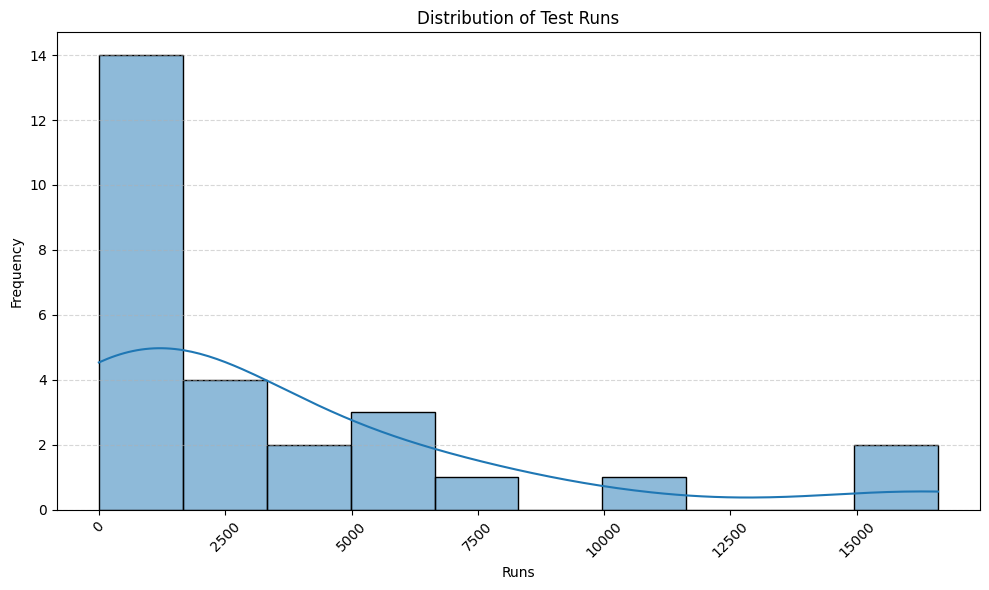

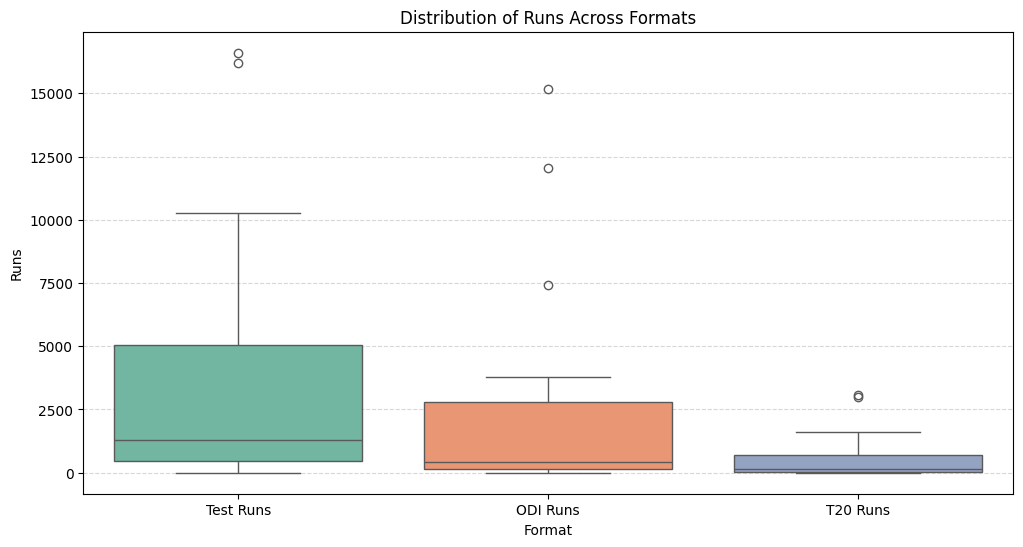

<ipython-input-31-04778257952d>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_scorers, x='Total Runs', y='Name', palette='viridis')


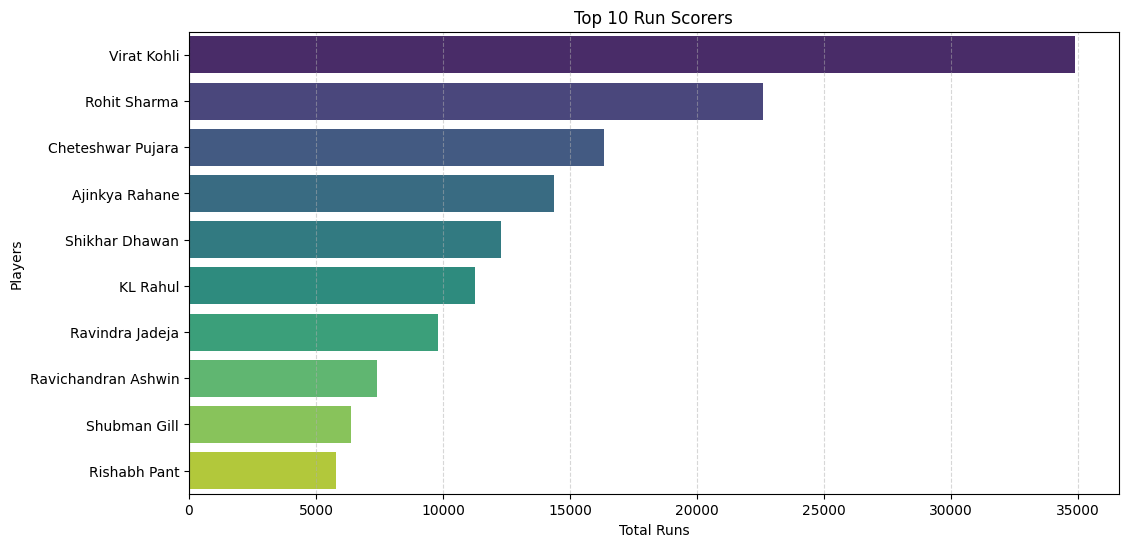

<Figure size 1200x600 with 0 Axes>

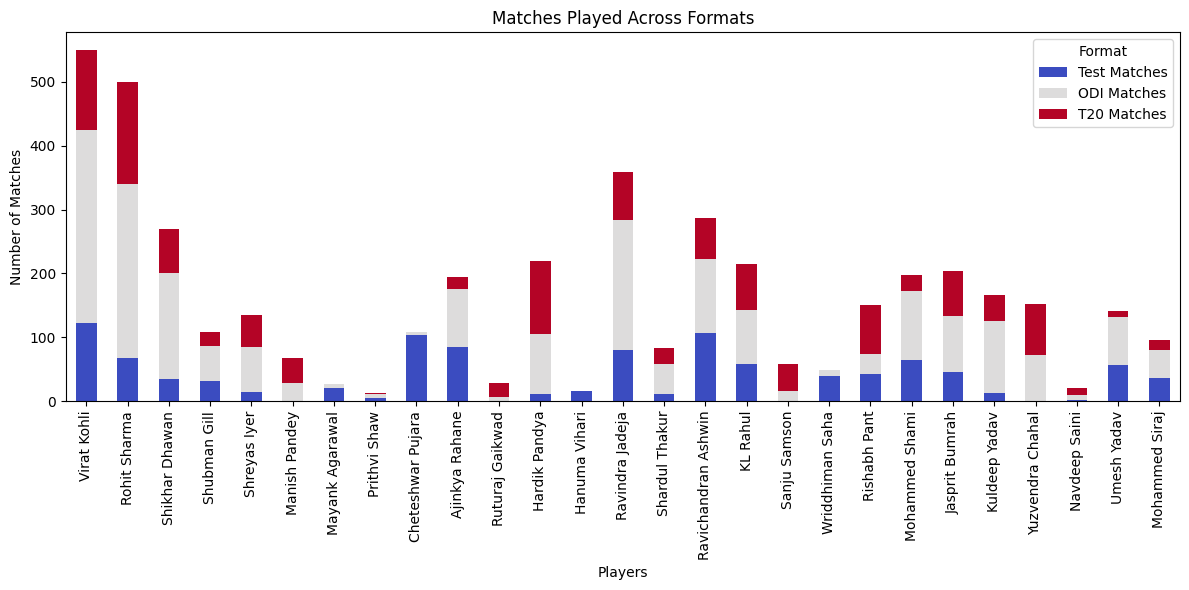

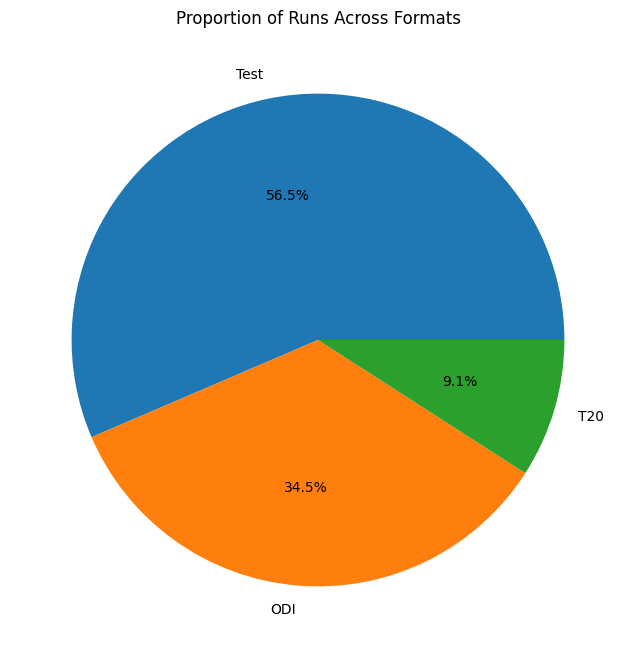

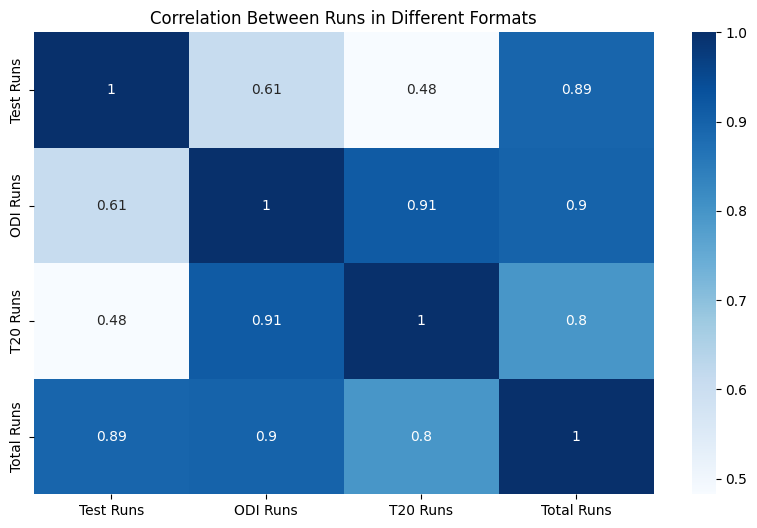

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example Visualization - Distribution of Test Runs
plt.figure(figsize=(10, 6))  # Increased figure size for better spacing
sns.histplot(df['Test Runs'], kde=True, bins=10)

# Adjust x-axis spacing
plt.xticks(rotation=45)  # Rotating labels for better visibility
plt.tick_params(axis='x', labelsize=10)  # Adjusting label size if needed

plt.title('Distribution of Test Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Adding a light grid for better readability
plt.tight_layout()  # Ensures everything fits well

plt.show()
import pandas as pd
import ast  # For safely converting string representations of dictionaries

# Load the cleaned data
df = pd.read_csv('cleaned_cricket_data.csv')

# Convert 'Career Stats' from string to dictionary
df['Career Stats'] = df['Career Stats'].apply(ast.literal_eval)

# Extract relevant metrics
df['Test Runs'] = df['Career Stats'].apply(lambda x: int(x['Test']['Runs']) if 'Test' in x and 'Runs' in x['Test'] else 0)
df['ODI Runs'] = df['Career Stats'].apply(lambda x: int(x['ODI']['Runs']) if 'ODI' in x and 'Runs' in x['ODI'] else 0)
df['T20 Runs'] = df['Career Stats'].apply(lambda x: int(x['T20']['Runs']) if 'T20' in x and 'Runs' in x['T20'] else 0)
df['Total Runs'] = df['Test Runs'] + df['ODI Runs'] + df['T20 Runs']

df['Test Matches'] = df['Career Stats'].apply(lambda x: int(x['Test']['Matches']) if 'Test' in x and 'Matches' in x['Test'] else 0)
df['ODI Matches'] = df['Career Stats'].apply(lambda x: int(x['ODI']['Matches']) if 'ODI' in x and 'Matches' in x['ODI'] else 0)
df['T20 Matches'] = df['Career Stats'].apply(lambda x: int(x['T20']['Matches']) if 'T20' in x and 'Matches' in x['T20'] else 0)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Test Runs', 'ODI Runs', 'T20 Runs']], palette='Set2')
plt.title('Distribution of Runs Across Formats')
plt.xlabel('Format')
plt.ylabel('Runs')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
top_scorers = df.nlargest(10, 'Total Runs')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_scorers, x='Total Runs', y='Name', palette='viridis')
plt.title('Top 10 Run Scorers')
plt.xlabel('Total Runs')
plt.ylabel('Players')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()
plt.figure(figsize=(12, 6))
df[['Name', 'Test Matches', 'ODI Matches', 'T20 Matches']].set_index('Name').plot(
    kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm'
)
plt.title('Matches Played Across Formats')
plt.ylabel('Number of Matches')
plt.xlabel('Players')
plt.legend(title='Format')
plt.tight_layout()
plt.show()
run_distribution = [
    df['Test Runs'].sum(),
    df['ODI Runs'].sum(),
    df['T20 Runs'].sum()
]

plt.figure(figsize=(8, 8))
plt.pie(run_distribution, labels=['Test', 'ODI', 'T20'], autopct='%.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Proportion of Runs Across Formats')
plt.show()
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Test Runs', 'ODI Runs', 'T20 Runs', 'Total Runs']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Between Runs in Different Formats')
plt.show()


In [24]:
df[['Test Runs', 'ODI Runs', 'T20I Runs']] = df[['Test Runs', 'ODI Runs', 'T20I Runs']].apply(pd.to_numeric, errors='coerce')


In [27]:
df.to_csv('cleaned_cricket_data.csv', index=False)
import pandas as pd

# Assuming 'df' is your cleaned DataFrame
file_path = 'cleaned_cricket_data.csv'

# Save as CSV
df.to_csv(file_path, index=False)

print(f"Data successfully saved to {file_path}")



Data successfully saved to cleaned_cricket_data.csv
